# Wine Quality 

## Imports

In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(style="ticks", color_codes=True)
%matplotlib inline

## Variables

In [133]:
red_wine_dataset_path = 'data/winequality-red.csv'
white_wine_dataset_path = 'data/winequality-white.csv'

quality_colors = sns.husl_palette(11)

## Load data

In [134]:
red_wine_data = pd.read_csv(red_wine_dataset_path, delimiter=';')
red_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [135]:
white_wine_data = pd.read_csv(white_wine_dataset_path, delimiter=';')
white_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

## Visualize raw data
### Pair plots
#### Red wine

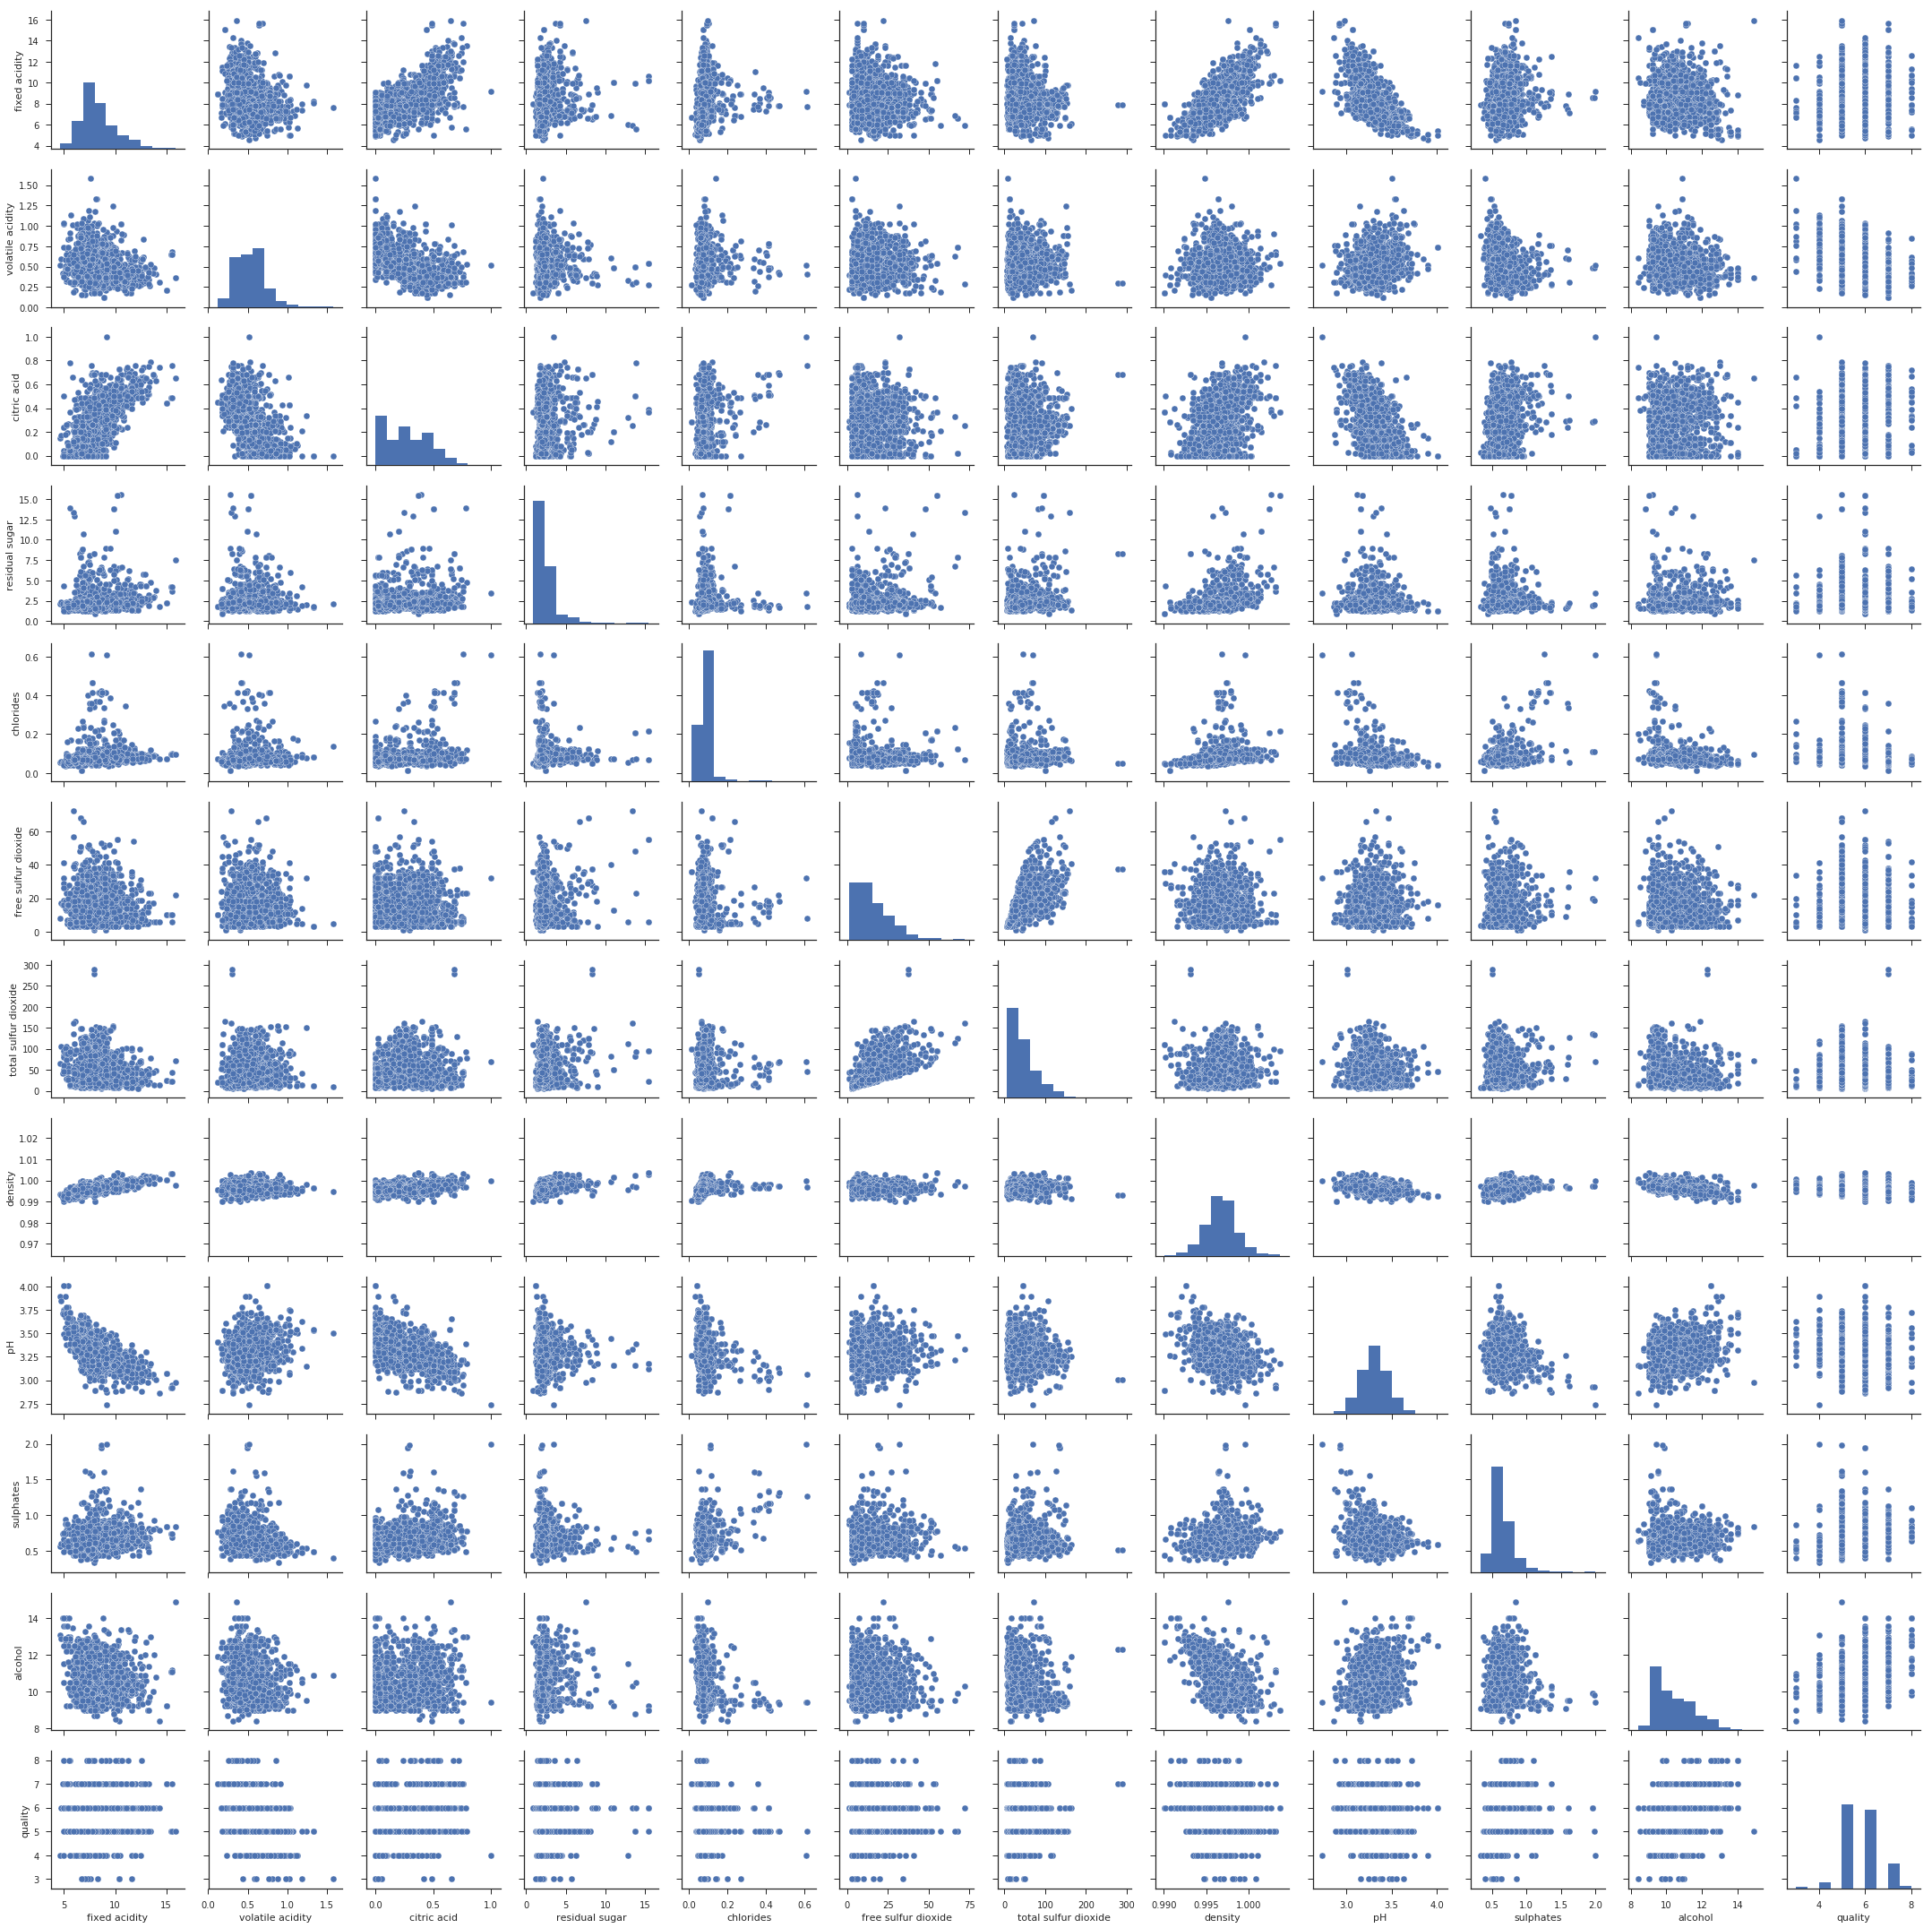

In [136]:
sns.pairplot(red_wine_data)

#### White wine

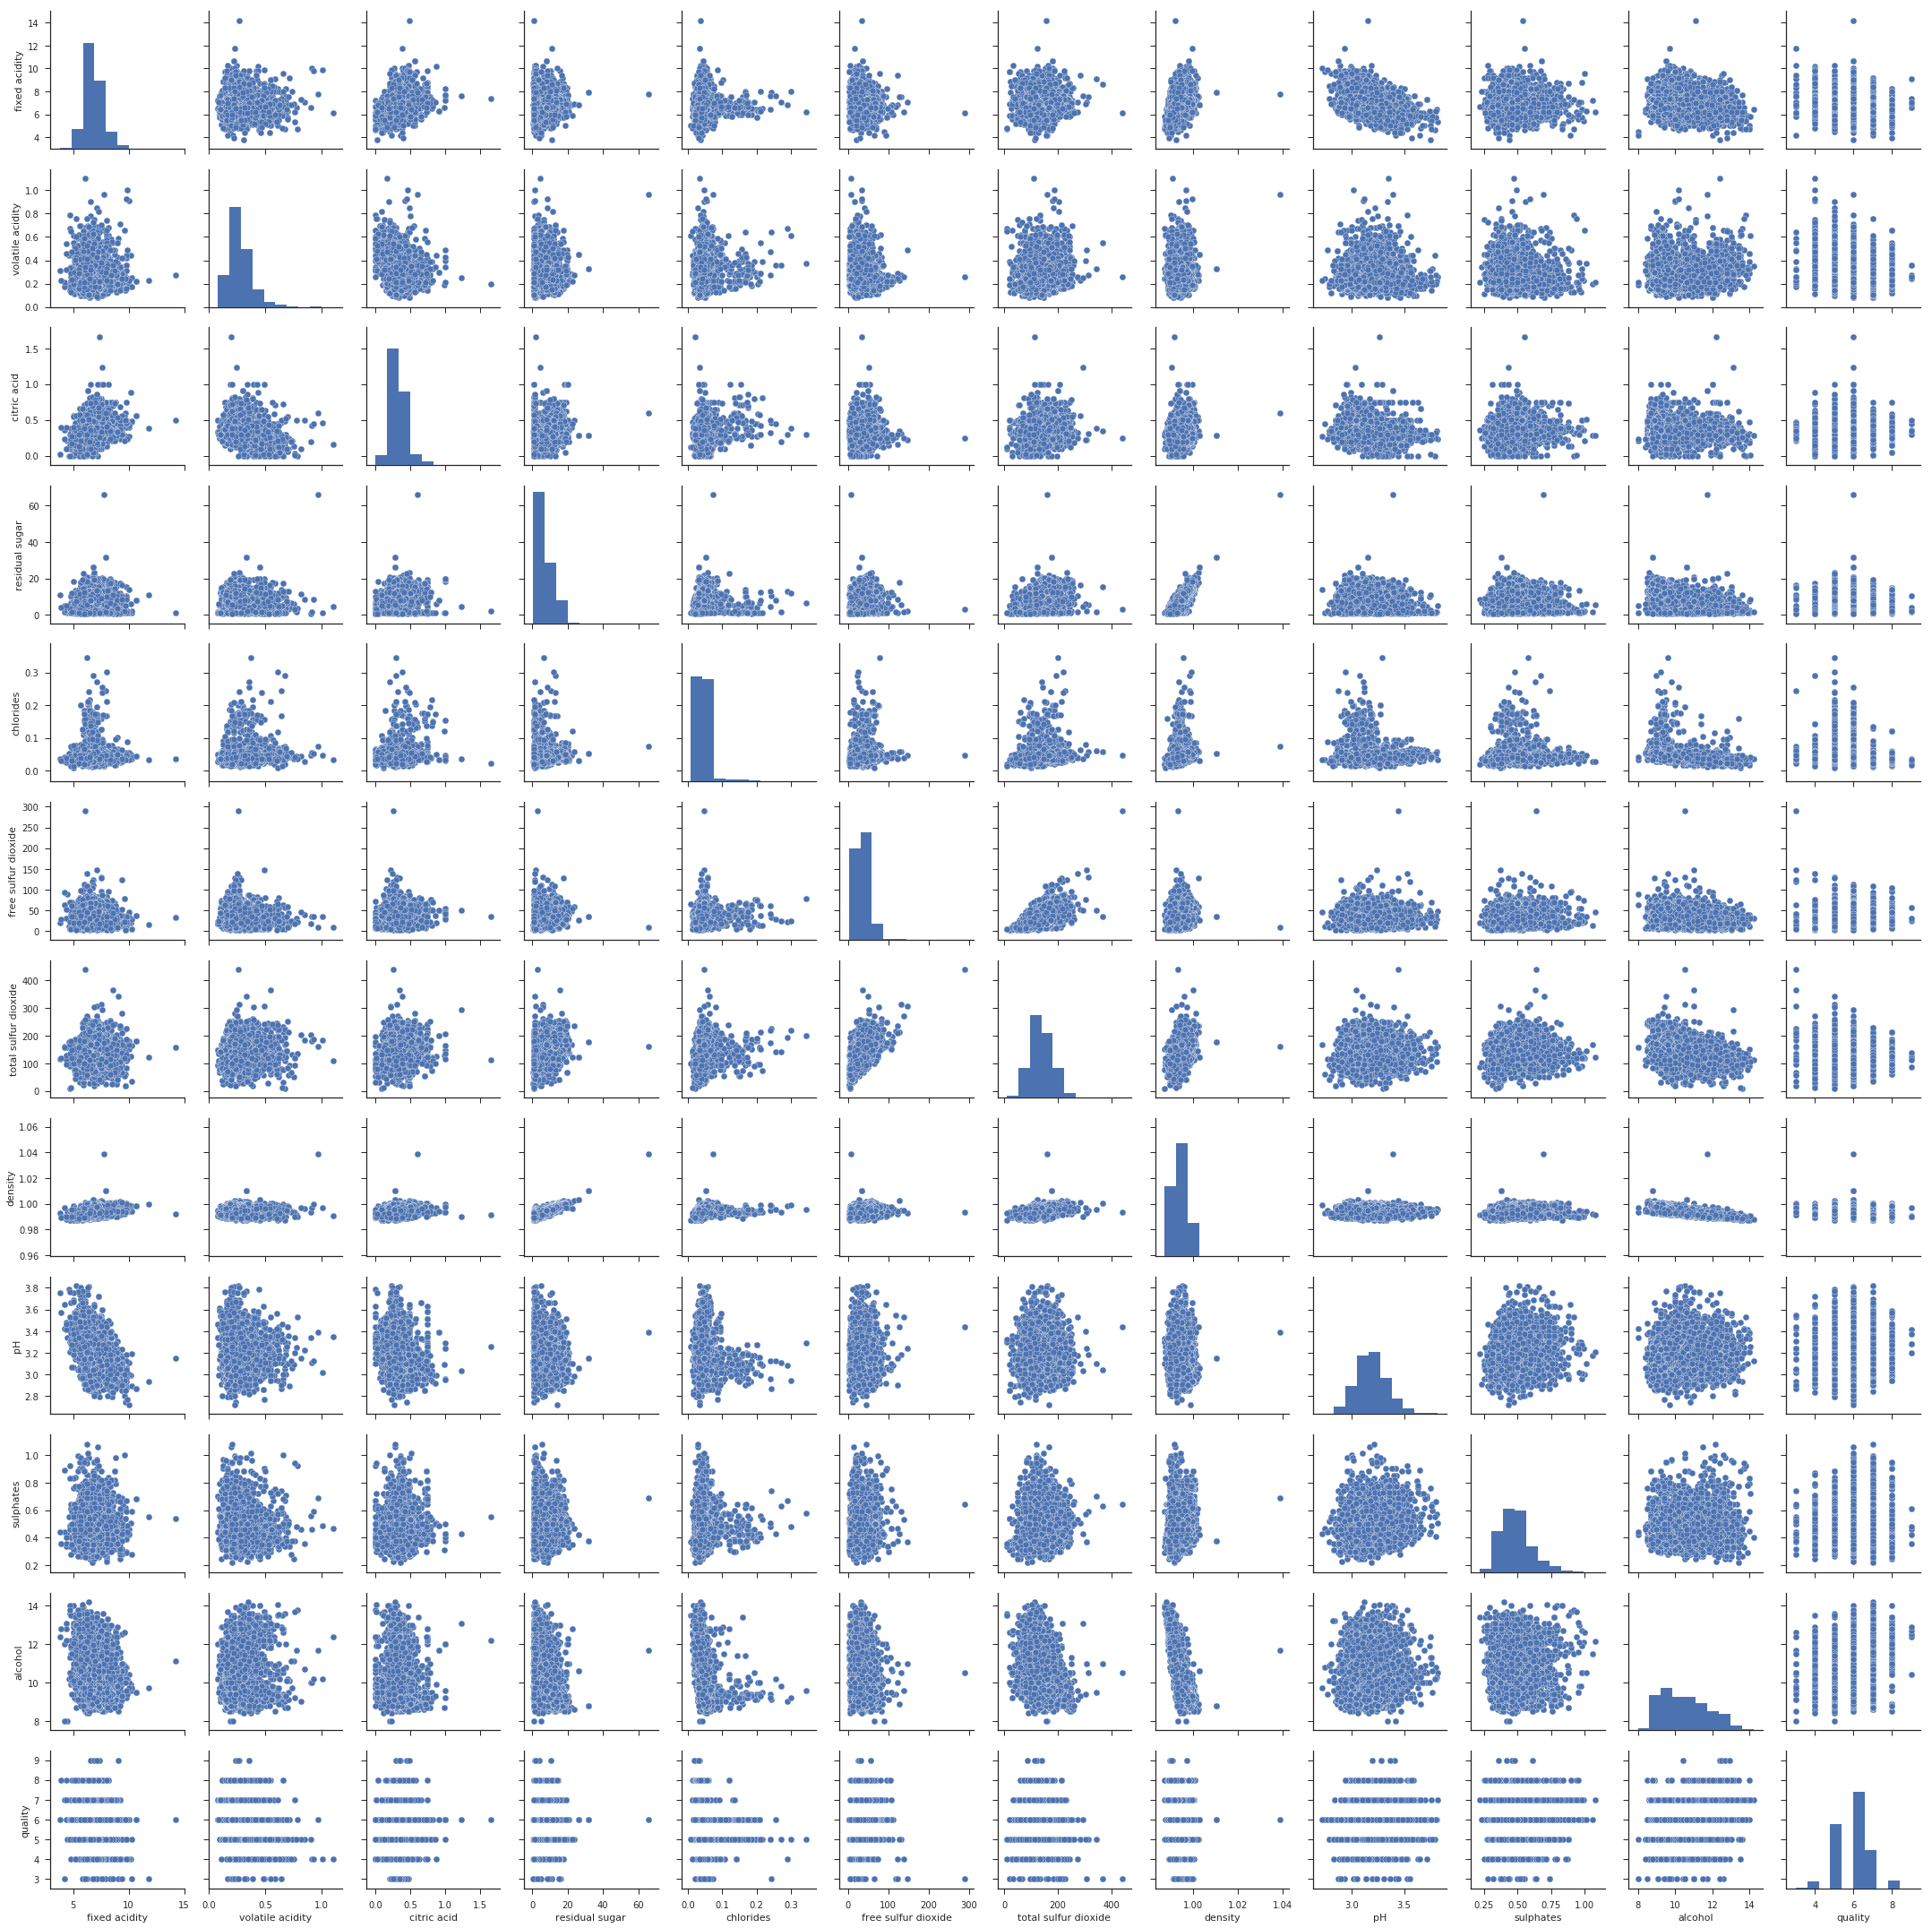

In [137]:
sns.pairplot(white_wine_data)

### Fixed Acidity distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Fixed Acidity distribution for the white wines according to quality')

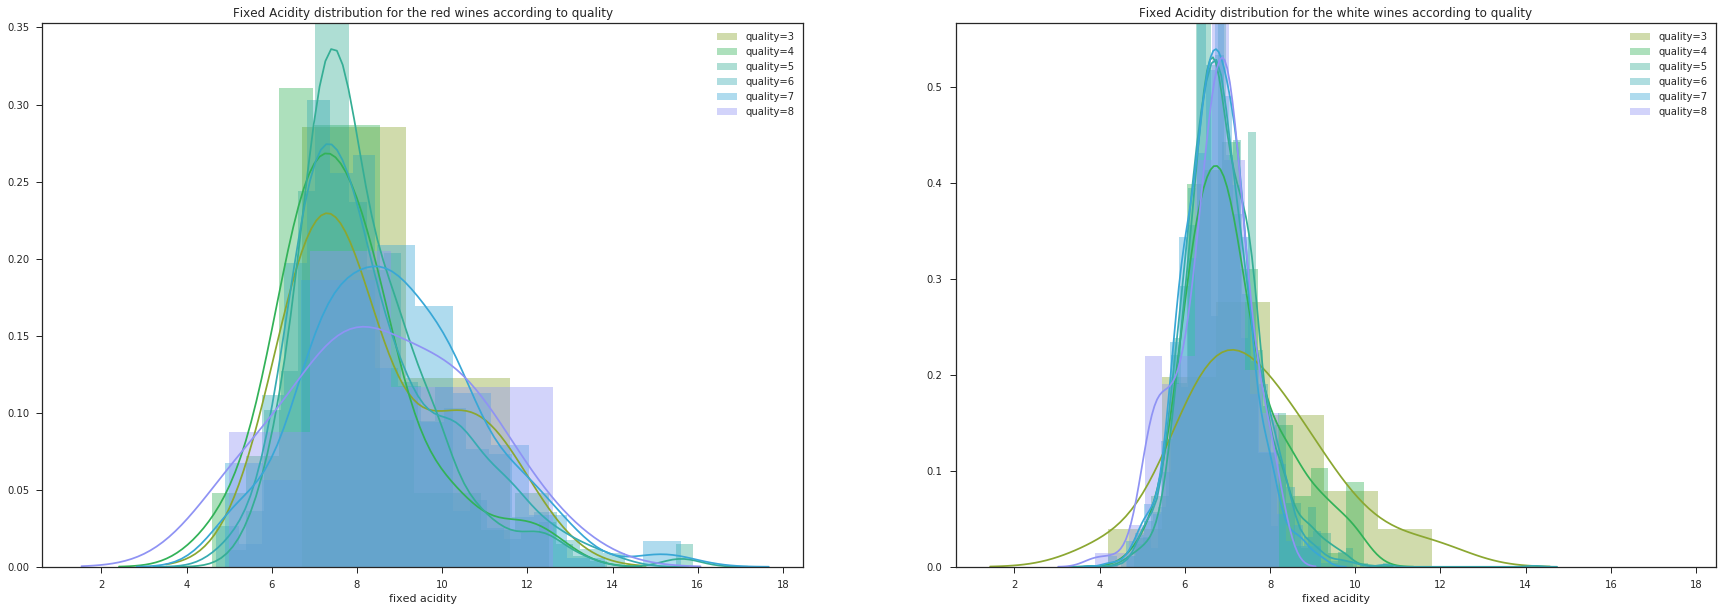

In [138]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["fixed acidity"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["fixed acidity"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Fixed Acidity distribution for the red wines according to quality')
axes[1].set_title('Fixed Acidity distribution for the white wines according to quality')

### Volatile Acidity distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Volatile Acidity distribution for the white wines according to quality')

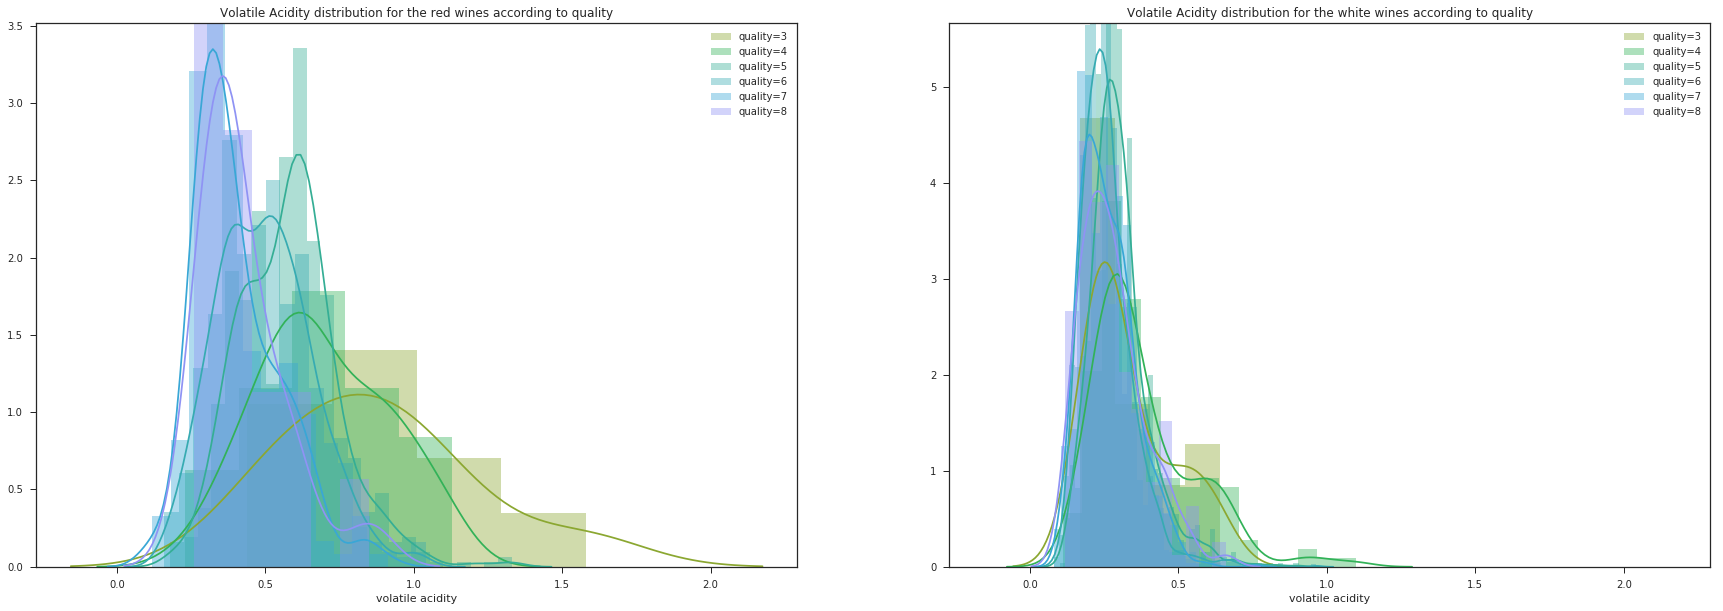

In [139]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["volatile acidity"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["volatile acidity"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Volatile Acidity distribution for the red wines according to quality')
axes[1].set_title('Volatile Acidity distribution for the white wines according to quality')

### Citric Acid distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Citric acid distribution for the white wines according to quality')

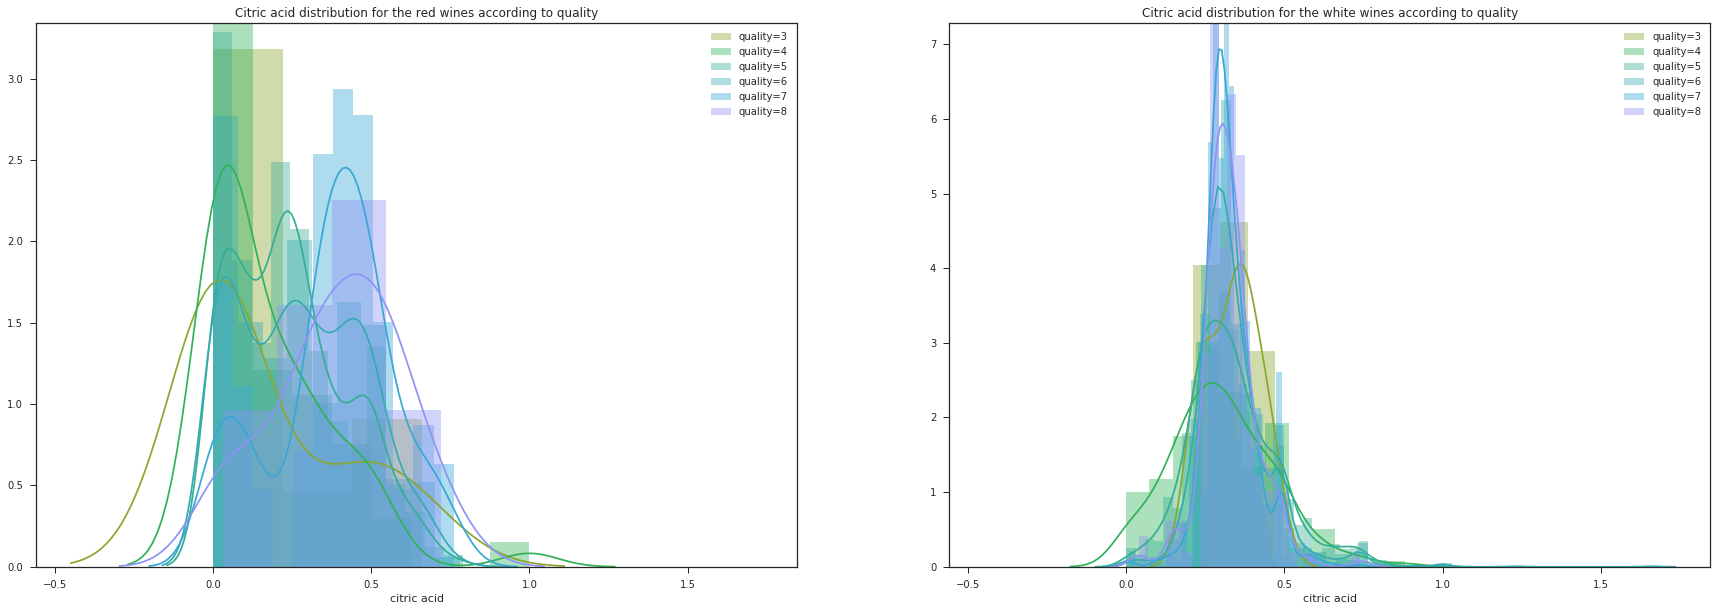

In [140]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["citric acid"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["citric acid"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Citric acid distribution for the red wines according to quality')
axes[1].set_title('Citric acid distribution for the white wines according to quality')

### Residual sugar distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Residual sugar distribution for the white wines according to quality')

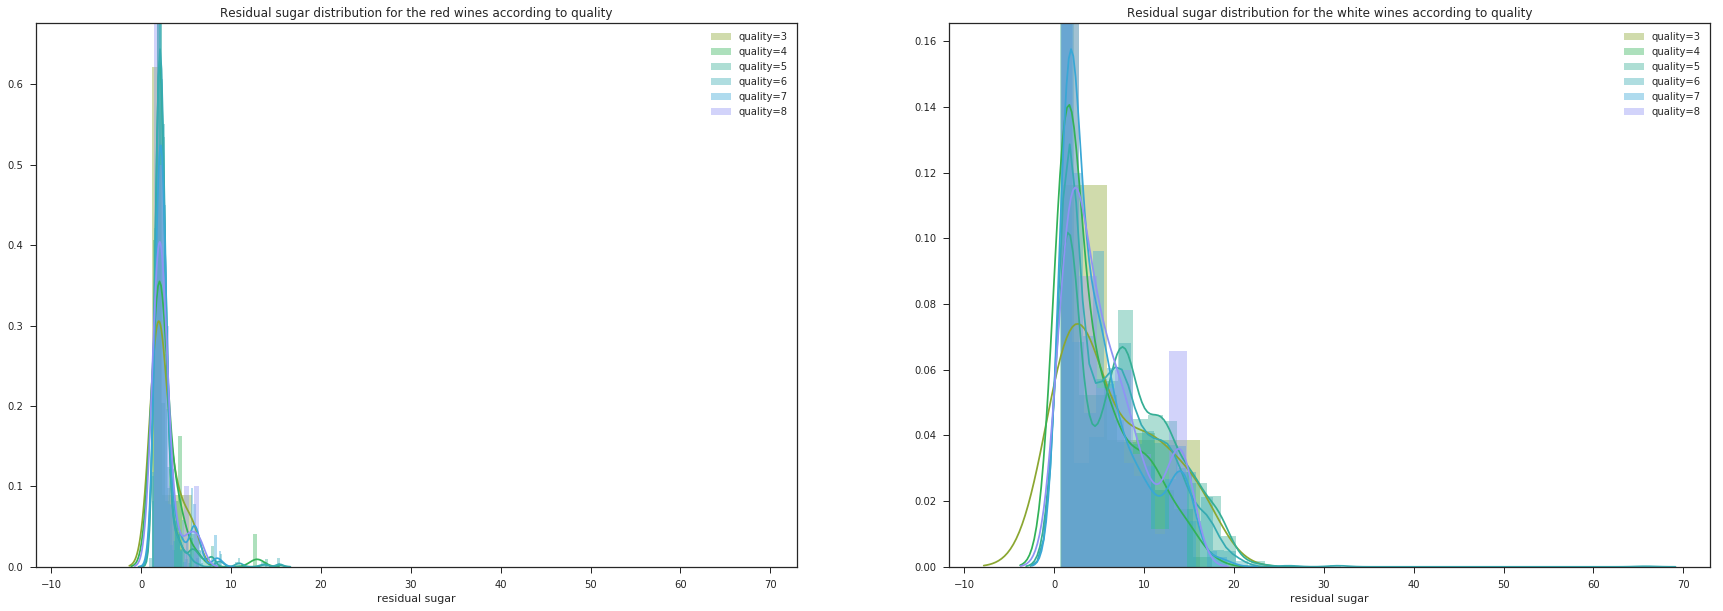

In [141]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["residual sugar"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["residual sugar"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Residual sugar distribution for the red wines according to quality')
axes[1].set_title('Residual sugar distribution for the white wines according to quality')

### Chlorides distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Chlorides distribution for the white wines according to quality')

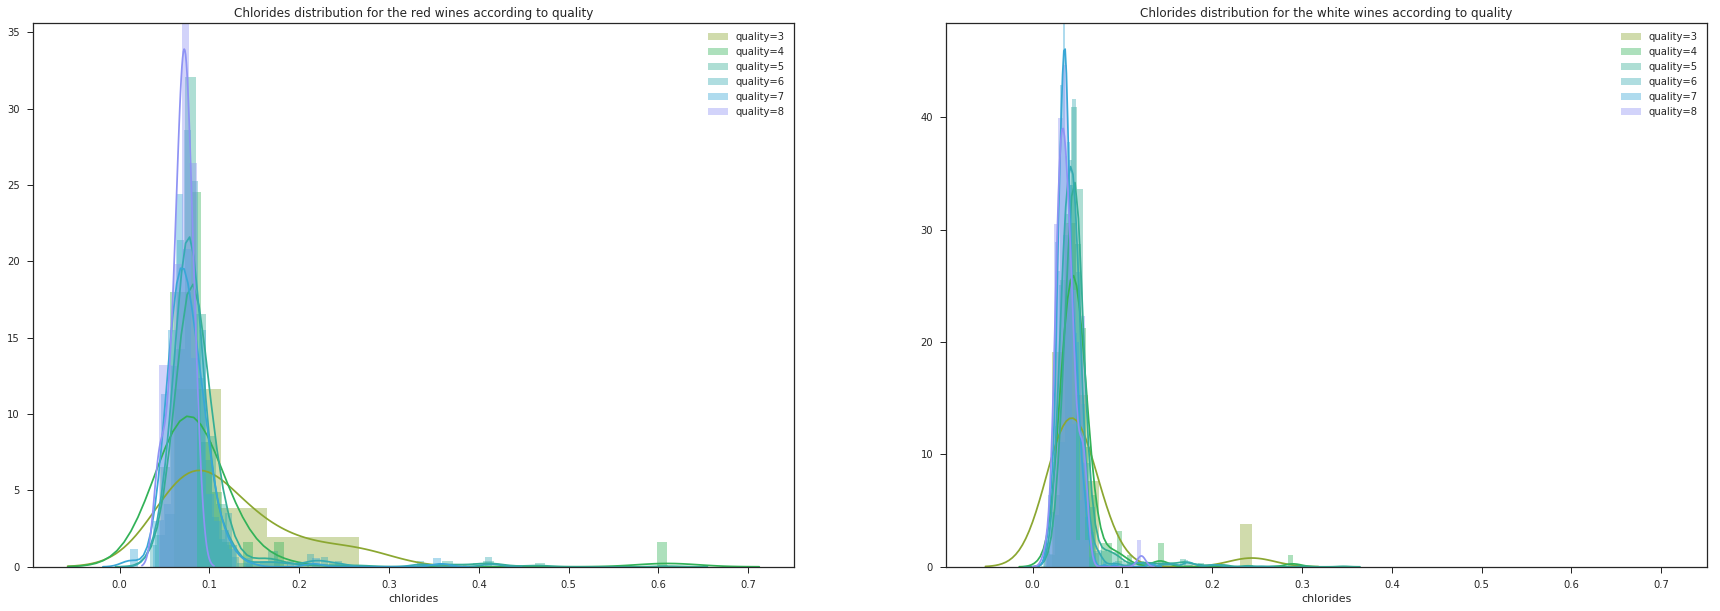

In [142]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["chlorides"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["chlorides"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Chlorides distribution for the red wines according to quality')
axes[1].set_title('Chlorides distribution for the white wines according to quality')

### Free sulfur dioxide distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Free sulfur dioxide distribution for the white wines according to quality')

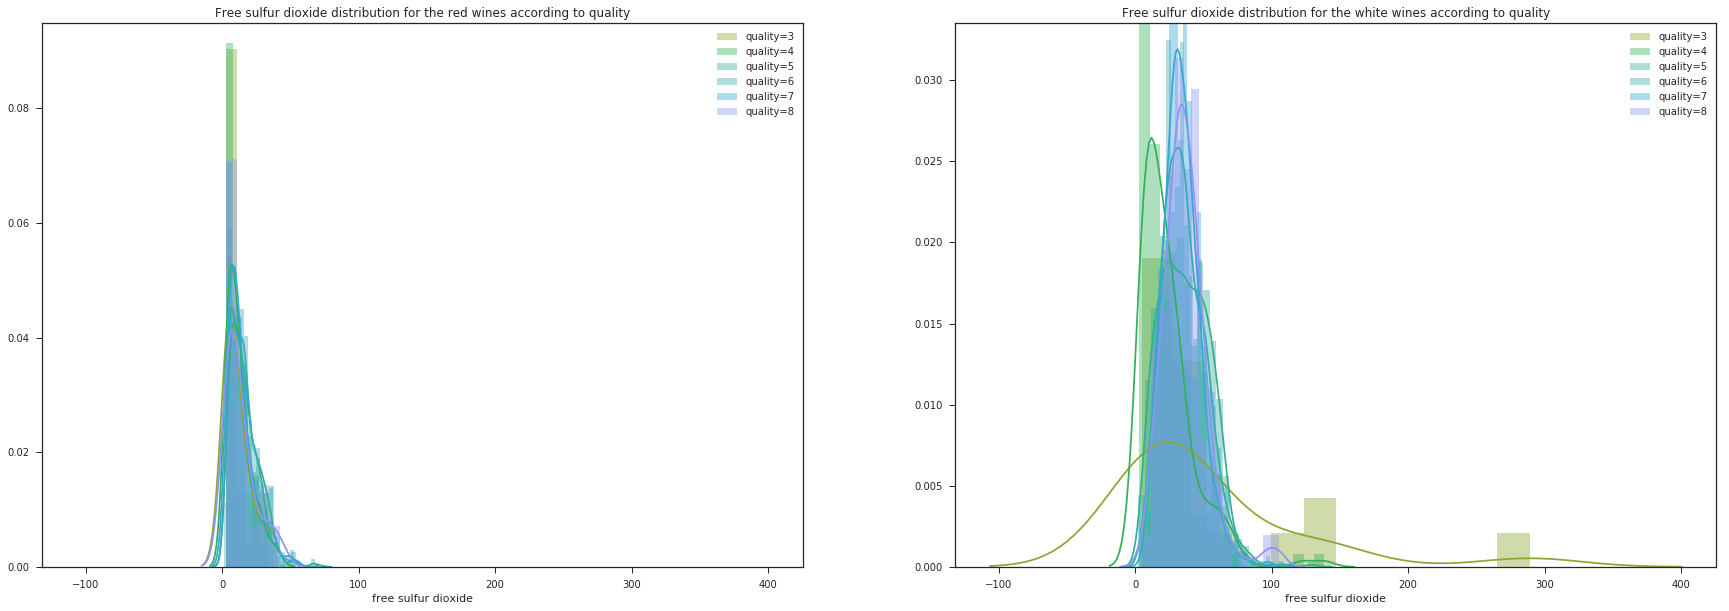

In [143]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["free sulfur dioxide"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["free sulfur dioxide"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Free sulfur dioxide distribution for the red wines according to quality')
axes[1].set_title('Free sulfur dioxide distribution for the white wines according to quality')

### Total sulfur dioxide distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total sulfur dioxide distribution for the white wines according to quality')

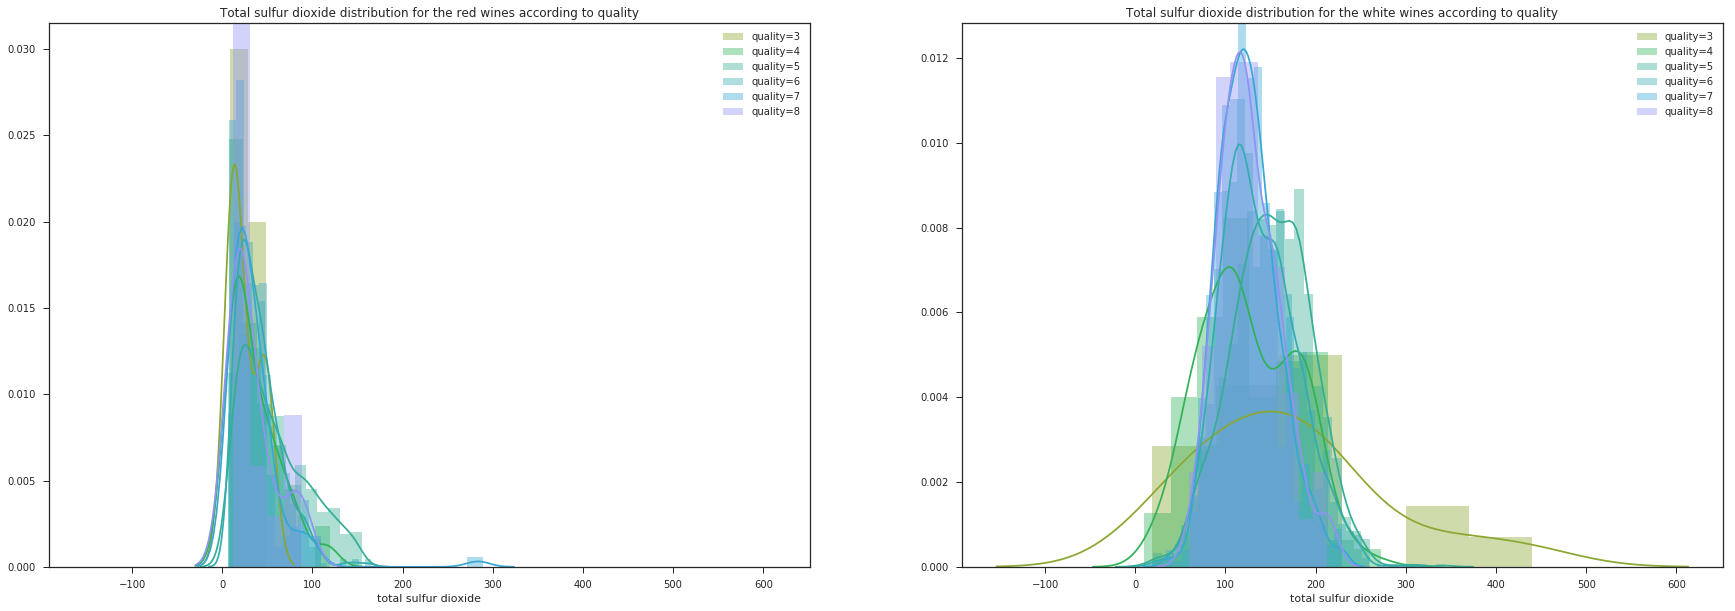

In [144]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["total sulfur dioxide"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["total sulfur dioxide"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Total sulfur dioxide distribution for the red wines according to quality')
axes[1].set_title('Total sulfur dioxide distribution for the white wines according to quality')

### Density distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Density distribution for the white wines according to quality')

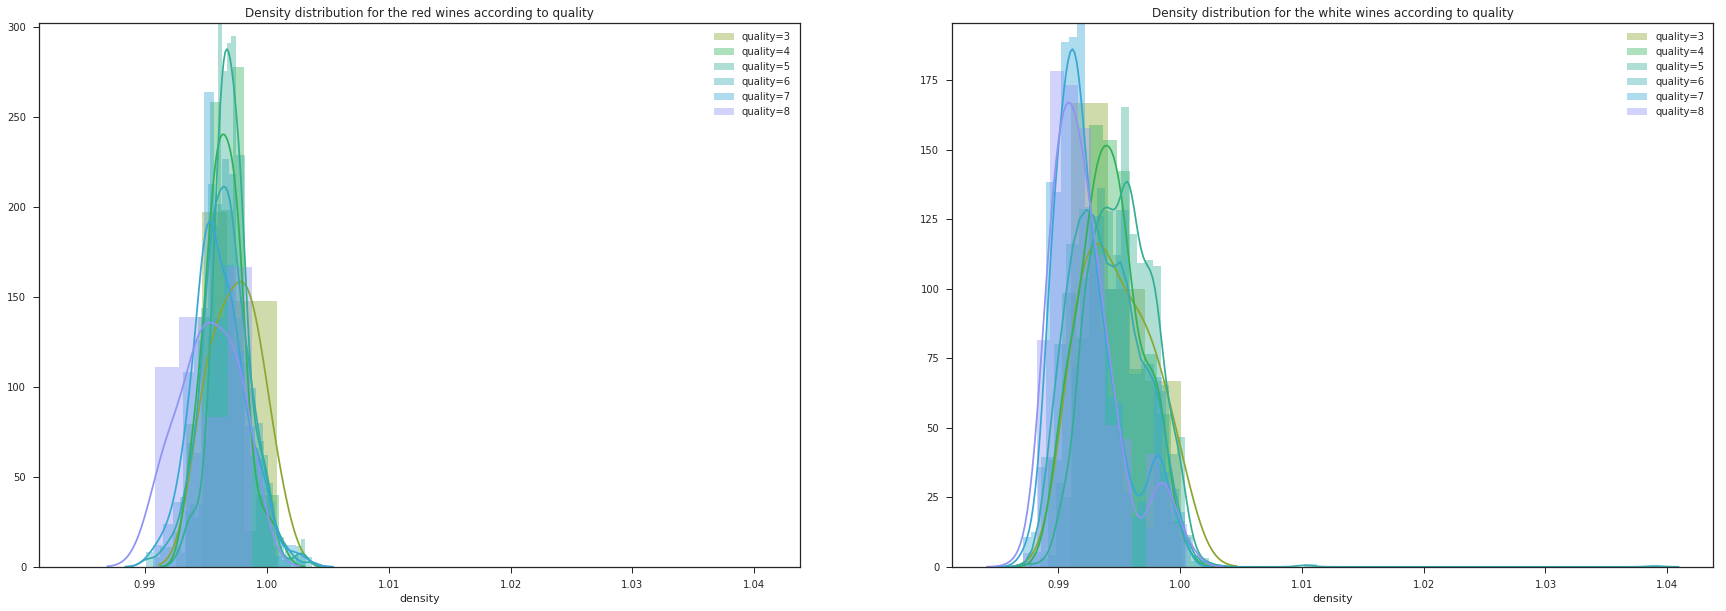

In [146]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["density"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["density"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Density distribution for the red wines according to quality')
axes[1].set_title('Density distribution for the white wines according to quality')

### pH distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'pH distribution for the white wines according to quality')

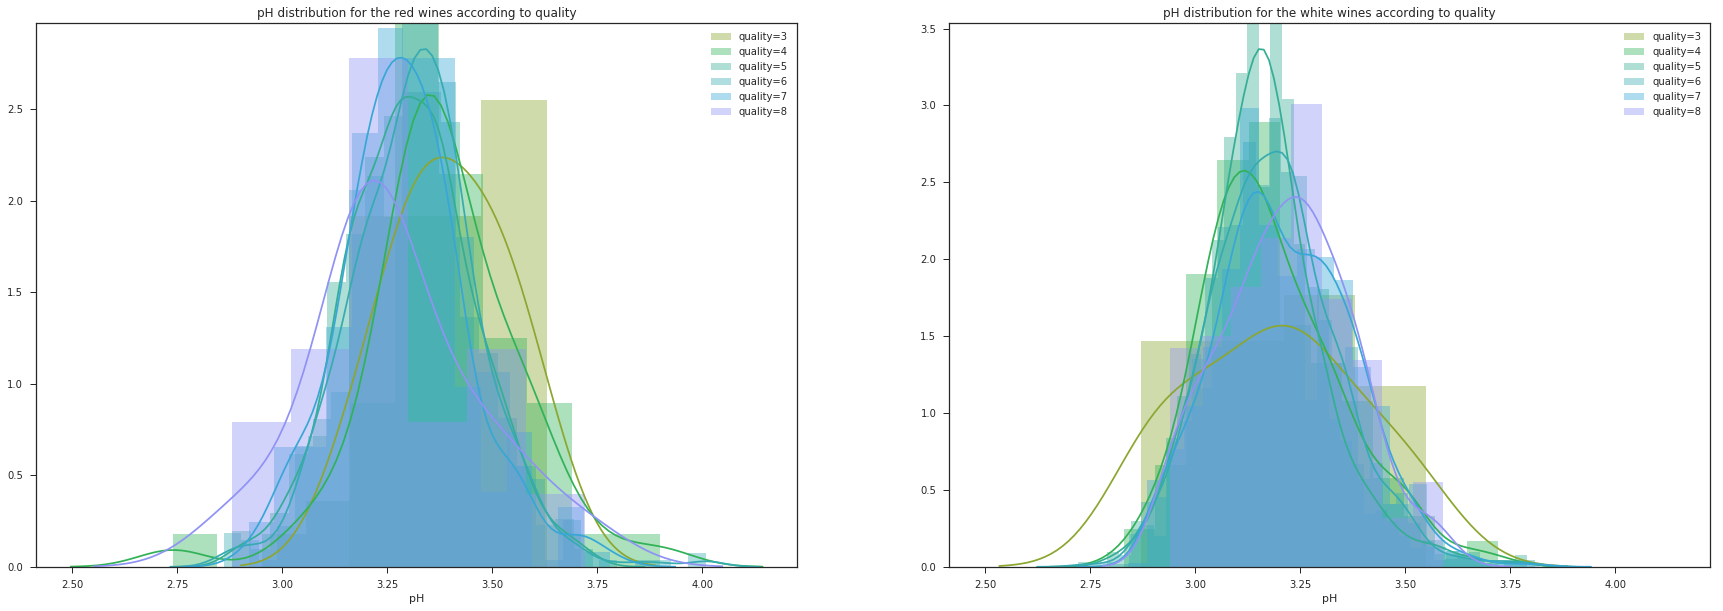

In [148]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["pH"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["pH"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('pH distribution for the red wines according to quality')
axes[1].set_title('pH distribution for the white wines according to quality')

### Citric Acid distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Citric acid distribution for the white wines according to quality')

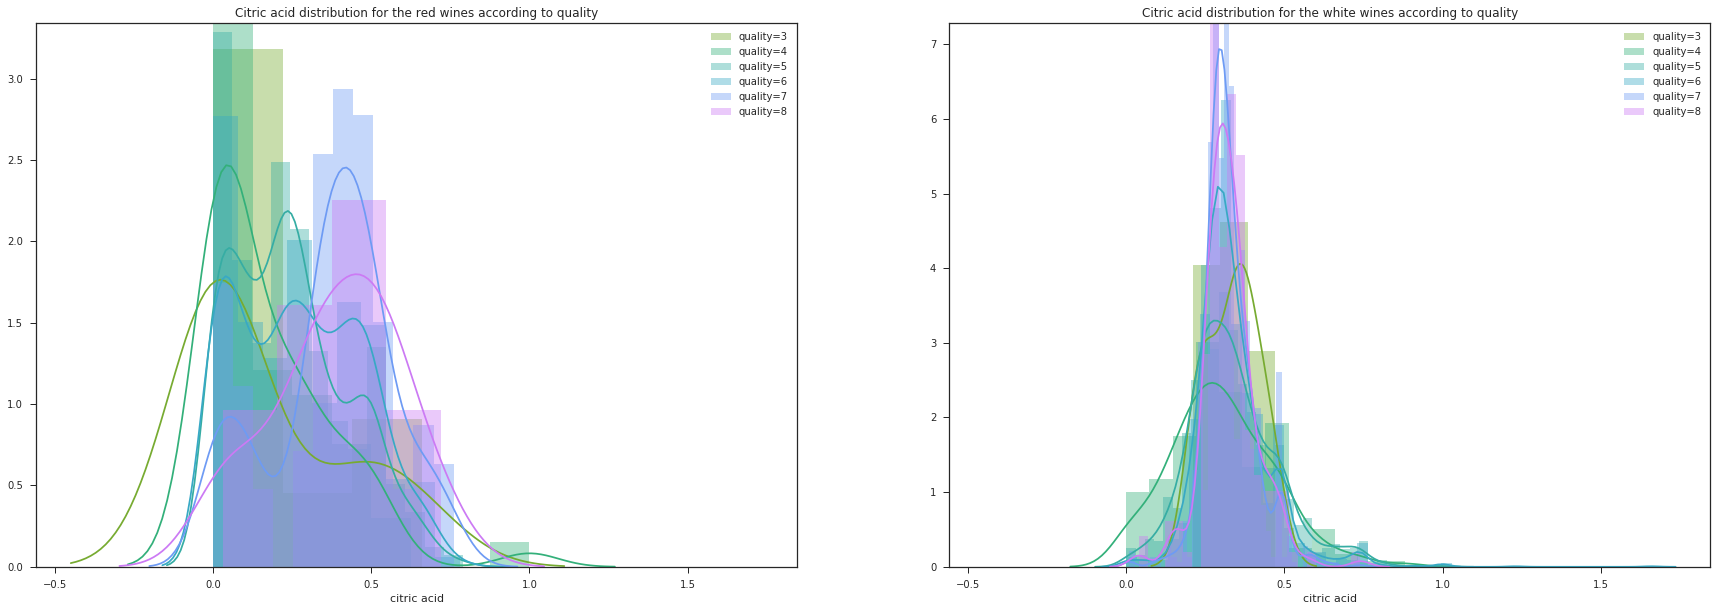

In [127]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["citric acid"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["citric acid"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Citric acid distribution for the red wines according to quality')
axes[1].set_title('Citric acid distribution for the white wines according to quality')

## PCA

### On red wine data

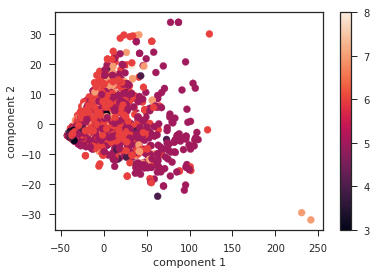

In [59]:
pca = PCA(n_components=2)
projected = pca.fit_transform(red_wine_data)
plt.scatter(projected[:, 0], projected[:, 1],
           c=red_wine_data.quality)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

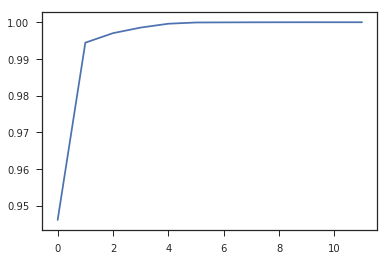

In [63]:
pca = PCA().fit(red_wine_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### On white wine

[[ 1.54452453e-03  1.69030937e-04  3.38646756e-04  4.73275083e-02
   9.75793989e-05  2.61872279e-01  9.63853329e-01  3.59706391e-05
   3.36199734e-06  3.40888191e-04 -1.25043553e-02 -3.28041170e-03]
 [-9.16673296e-03 -1.54624759e-03  1.40367326e-04  1.49314295e-02
  -7.20390584e-05  9.64637649e-01 -2.62682018e-01 -1.83976939e-05
  -4.08057870e-05 -3.60533010e-04  6.47965595e-03  1.09933430e-02]]


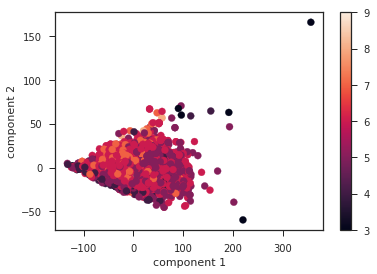

In [67]:
pca = PCA(n_components=2)
projected = pca.fit_transform(white_wine_data)
plt.scatter(projected[:, 0], projected[:, 1],
           c=white_wine_data.quality)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
print(pca.components_)

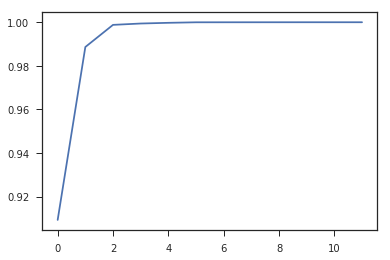

In [65]:
pca = PCA().fit(white_wine_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

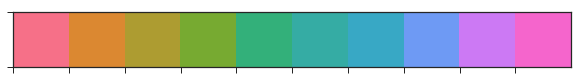

In [83]:
sns.palplot(sns.husl_palette(10))